# **Reconocimiento de Patrones - Proyecto final**
# Reconocimiento de letras del alfabeto inglés
# Ing. Daniel Kohkemper

________________________________________________________________________________________________

## 1. Introducción

El archivo de datos de este proyecto fue creado en 1991 por David Slate [1]. El mismo consiste en un conjunto de valores estadísticos obtenidos de imágenes rectangulares en blanco y negro de las 26 letras del alfabeto inglés y cada imagen fue levemente distorsionada. Los datos no presentan valores faltantes y vienen en formato numérico (no existen valores categóricos), lo cual facilita mucho el preprocesamiento de los mismos. 

Existen 20.000 muestras del alfabeto inglés, lo cual da un promedio de 769 muestras por letra. Se utilizaron 20 tipos de fuente diferentes, con 5 tipos diferentes de trazo y 6 tipos diferentes de letras, generados de manera aleatoria siguiendo una distribución uniforme.

En 1991, este problema se consideraba uno difícil, debido a ''la amplia diversidad de fuentes y la naturaleza primitiva de los datos''. En el trabajo de Slate [2] se encuentra el proceso de obtención de los datos de manera más detallada, el cual en la actualidad se puede describir como un trabajo de la rama del Procesamiento de Imágenes. Un ejemplo de las letras utilizadas se puede observar en la siguiente figura:

![Título](fig/letras_ex.png)

Para cada imagen, se obtuvieron diferentes métricas y estadísticas, las cuales fueron normalizadas en un rango de 0 a 15 descritas a continuación. 

1.	lettr	Letra mayúscula	(26 valores de A a Z) 
2.	x-box	posición horizontal de la imagen
3.	y-box	posición vertical de la imagen
4.	width	ancho de la imagen en pixeles
5.	high    alto de la imagen en pixeles
6.	onpix	# total de pixeles en el caracter
7.	x-bar	media horizontal (x) de pixeles encendidos
8.	y-bar	media vertical (y) de pixeles encendidos
9.	x2bar	media cuadrática horizontal de 7.
10.	y2bar	media cuadrática vertical de 8.
11.	xybar	media de correlación x y
12.	x2ybr	media de x * x * y 
13.	xy2br	media de x * y * y
14.	x-ege	valor medio de bordes de izq a der
15.	xegvy	correlación de bordes en x con y	
16.	y-ege	valor medio de bordes de abajo hacia arriba
17.	yegvx	correlación de bordes en y con x

El conjunto de datos fue utilizado en un estudio realizado por D. Slate, que utiliza un sistema de clasificación adaptativa basado en aquel de J.H. Holland, el cual consiste en la creación de una lista de reglas condición-acción (clasificadores) que son aplicadas en paralelo a un conjunto de mensajes (entradas).

El sistema consiste en los siguientes pasos:

1. Un algoritmo de desempeño que compara las reglas con los mensajes para determinar cuáles reglas deben ser activadas.
2. Un algoritmo de reforzamiento que modifica el puntaje o fuerza de cada regla.
3. Un algoritmo que crea reglas que generaliza ejemplares o combina reglas para crear nuevas.

El aprendizaje del sistema se realizó mediante la separación del set de datos de 20.000 en 16.000 datos de entrenamiento y 4.000 de prueba, lo que representa un porcentaje de 80%-20%. El programa se corrió 5 veces con el set de entrenamiento (se presupone una cross-validación) en lo que se crearon nuevas reglas, se descartaron las insatisfactorias y se modificaron las estadísticas respectivamente de cada regla. De esta manera se logró expandir el conjunto de pruebas a 80.000. La sexta pasada se realizó sin generar nuevas reglas, y aquellas que no lograron cumplir los niveles de desempeño pre-establecidos fueron descartadas. Finalmente, se estimuló el sistema con el set de prueba para determinar el nivel global de desempeño del sistema, en el cual no se generaron ni modificaron reglas, sino que se obtuvieron las métricas de desempeño finales.

El sistema de clasificación se describe a continuación:

1. Comparar el vector de atributos de un ítem de prueba (muestra) con los atributos especificados para cada clasificador en la regla actual.
2. Seleccionar un set que se ajuste [M] que consiste en todos los clasificadores cuyas condiciones son satisfechas por el vector de atributos de la muestra.
3. Calcular un puntaje (o apuesta) para cada clasificador del set M. Asignar la categoría asociada con el puntaje máximo como salida del sistema.
4. Si se está en fase de aprendizaje, modificar las estadísticas de desempeño de uno o más clasificadores como es especificado por el sistema de puntajes.
5. Si se está en la fase de aprendizaje, descartar las reglas débiles y crear nuevas reglas de acuerdo al algoritmo de creación de reglas.
6. Seleccionar el siguiente ítem de prueba (muestra) y repetir el proceso.

De manera resumida, el sistema de codificación de atributos utiliza tres métodos distintos: binario (BIN), codificación Gray (GRA) y entero (INT). El sistema de creación de reglas se realiza por medio de varios métodos: aleatorio (RAN), híbrido (HYB), 
mutación (MUT), combinación de dos reglas (CROSS) y generalización basada en ejemplos (EXM). Una explicación más detallada de estos procedimientos además del sistema de puntaje puede revisarse en [2].

La investigación reporta un porcentaje de correcta clasificación de muestras de la siguiente manera:

1. Binario:   43,2% - 54,7%
2. Gray Code: 45,9& - 59,3%
3. Entero:    70,4% - 80,0%

### Aprendizaje de máquina basado en reglas

Esta rama abarca cualquier método que identifica, aprende o evoluciona un conjunto de reglas. El conocimiento completo del sistema se basa en las relaciones que se puedan hacer entre los datos de entrada con sus salidas por medio del conjunto de reglas. Estos sistemas dependen de conocimiento contextual de la semántica de los datos, por lo que su uso no es universal y aplica dentro del propio significa de los datos. Típicamente, las reglas se generan en la forma IF ... THEN, es decir, condición y resultado.

Estos sistemas tienen alguna semejanza con los árboles de decisión, así como también poseen varias diferencias. En los sistemas basados en reglas, se puede hacer un enfoque top-down o bottom-up con el que se puede llegar a una clasificación de lo general a lo particular o viceversa. Los árboles de búsqueda siguen más bien una direción top-down. Por otro lado, en un sistema de reglas, estas son generadas por un humano, mientras que en un árbol se generan a partir de las propiedades estadísticas y la distribución de los datos. Usualmente se decide usar la última cuando el sistema es muy complejo de entender para poder crear las reglas de manera manual, las cuales dependen de la habilidad del diseñador de poder describir enteramente el problema.

### Conclusiones preliminares sobre el estudio

Se observa que este estudio tiene casi 30 años de haberse realizado, lapso en el cual las metodologías y tecnologías de reconocimiento de patrones y aprendizaje supervisado han avanzado bastante. El método de clasificación por reglas es poco utilizado actualmente, con lo que sería un buen caso de estudio probar el set de datos con métodos más utilizados recientemente, e incluso por medio de redes neuronales.


## Preprocesamiento

Aunque se indicó anteriormente que el set de datos es bastante íntegro y no posee valores faltantes, se utiliza el código para eliminar datos faltantes. Se cargan además las bibliotecas básicas y se asignan los nombres de los atributos del set de datos así como la variable de salida.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)

# URL address of data set
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"

# Define header of dataset, obtain this information from dataset information
# This is taken from the data set itself
header = ['letter', 'x_box', 'y_box', 'width','high','onpix','x_bar','y_bar','x2bar','y2bar','xybar','x2ybr','xy2br','x_ege','xegvy','y_ege', 'yegvx']

# load dataset as csv file
df = pd.read_csv("data/letter_recognition.data",header=None,names=header)

# if dataset has '?' in it, convert these into NaN
df = df.replace('?', np.nan)
# drop the NaN
df = df.dropna(axis=0, how="any")

# Print some values of the data set
df.head(5)


,letter,x_box,y_box,width,high,onpix,x_bar,y_bar,x2bar,y2bar,xybar,x2ybr,xy2br,x_ege,xegvy,y_ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


Para facilitar el manejo y graficación de los datos, se reducirá el set de datos temporalmente a las 5 vocales del alfabeto.

In [2]:
df = df[(df.letter == 'A') | (df.letter == 'E') | (df.letter == 'I') | (df.letter == 'O') | (df.letter == 'U')]

df.head(5)

,letter,x_box,y_box,width,high,onpix,x_bar,y_bar,x2bar,y2bar,xybar,x2ybr,xy2br,x_ege,xegvy,y_ege,yegvx
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
11,O,6,13,4,7,4,6,7,6,3,10,7,9,5,9,5,8
16,O,3,4,4,3,2,8,7,7,5,7,6,8,2,8,3,8
23,O,6,11,7,8,5,7,6,9,6,7,5,9,4,8,5,5


Ahora se separan los atributos y la clase en variables separadas, para los procesos de entrenamiento

In [3]:
# from sklearn import preprocessing

# Make a list of features only
features = ['x_box', 'y_box', 'width','high','onpix','x_bar','y_bar','x2bar','y2bar','xybar','x2ybr','xy2br','x_ege','xegvy','y_ege', 'yegvx']

# Separate features from class(es)
input_features = df.loc[:,features].values
output_class   = df.loc[:,['letter']].values
# Squeeze output into one single column
output_class     = output_class.ravel()

# Print variable to verify classes are letters
output_class

array(['I', 'A', 'O', ..., 'O', 'E', 'A'], dtype=object)

Ahora se crea una copia de la clase codificada con valores numéricos para el entrenamiento de las redes neuronales

In [4]:
# Make a compy of class values (letters at this points)
output_class_num = df.loc[:,['letter']].values
# Squeeze output into one single column
output_class_num= output_class_num.ravel()

# Apply label encoder to convert letters to numbers (this will be needed for the neural network)
le = preprocessing.LabelEncoder()
output_class_num[:] = le.fit_transform(output_class_num[:])

# Print variable to verify classes are numbers
output_class_num

array([2, 0, 3, ..., 3, 1, 0], dtype=object)

## Análisis explotorio de datos

Antes de proceder con el aprendizaje automático, se realiza un análisis exploratorio de los datos por medio de gráficas y aprendizaje no supervisado para poder tener más información y sentido del set de datos.

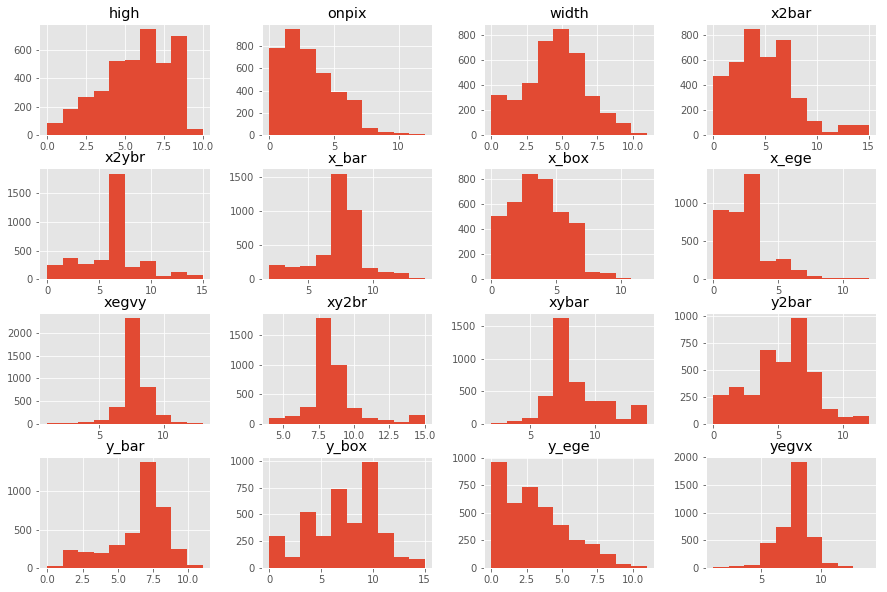

In [5]:
%matplotlib inline
plt.style.use('ggplot')
pd.DataFrame.hist(df, figsize = [15,10]);

In [6]:
from sklearn.model_selection import train_test_split

# Separate data intro training and test sets
x_train, x_test, y_train, y_test = train_test_split(input_features, output_class, test_size=0.20, random_state=50)

output_class

array(['I', 'A', 'O', ..., 'O', 'E', 'A'], dtype=object)

### Análisis PCA

Ahora se realiza un análisis de componentes principales para determinar cómo es el comportamiento e importancia de los diferentes atributos del set de datos con respecto a la clasificación.

[0.30443498 0.52778124 0.66355855 0.74949205 0.80869949 0.8538637
 0.8901155  0.91368788 0.93685236 0.95234255 0.96640291 0.97676916
 0.98458007 0.99134736 0.99655918 1.        ]


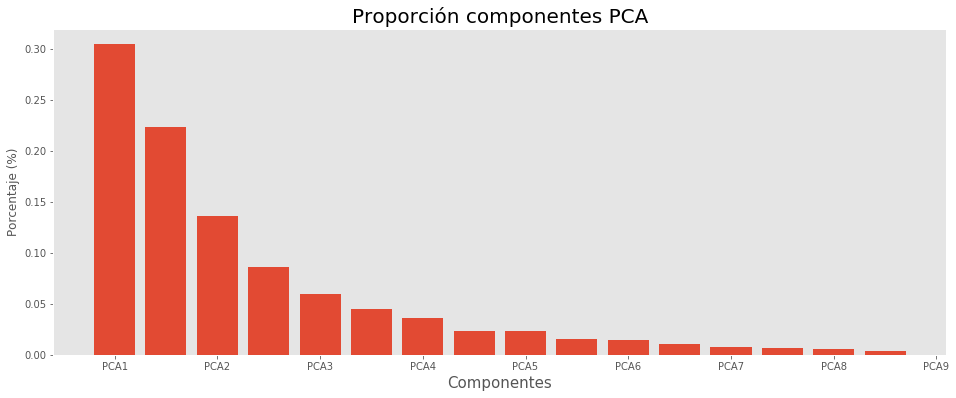

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

input_feat_scaled = StandardScaler().fit_transform(input_features)

n_atributes = input_features.shape[1]

# Se extrae el PCA y se introducen en los datos
pca = PCA(n_components = input_features.shape[1])
principalComponents = pca.fit_transform(input_features)

# Nombra cada una de las componentes del PCA
pca_features = ['PCA' + str(i) for i in range(n_atributes)]
principalDf = pd.DataFrame(data = principalComponents, columns = pca_features)

# Grafica los datos
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1,1,1) 
#Grafica las componentes de PCA según su porcentaje
ax.bar(range(n_atributes),pca.explained_variance_ratio_)
ax.set_xlabel('Componentes', fontsize = 15)
ax.set_xticklabels(pca_features)
ax.set_ylabel('Porcentaje (%)')
ax.set_title('Proporción componentes PCA',fontsize = 20)
ax.grid()

print(pca.explained_variance_ratio_.cumsum())

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

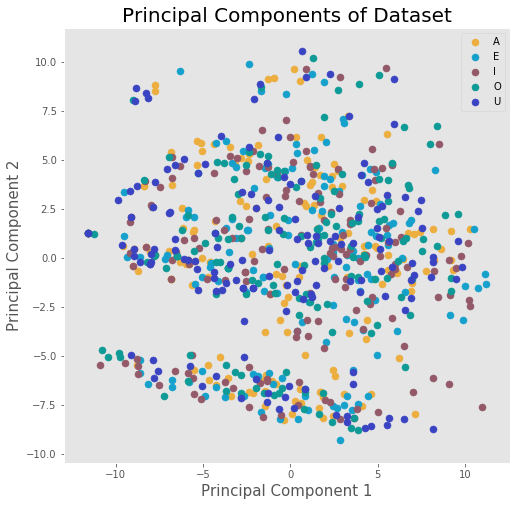

In [8]:
from sklearn.utils import column_or_1d
from sklearn import preprocessing

# Se apagan los warnings para evitar las alertas de posibles cambios de versión en Python3
import warnings
warnings.filterwarnings('ignore', category=UnicodeWarning, append=True)

# Se escoge graficar solo dos componentes
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(input_features)

principalDf = pd.DataFrame(data = principalComponents)

le = preprocessing.LabelEncoder()
le.fit(df[['letter']])
targets = le.classes_.ravel()

#Se concatenan las componentes de PCA con los targets
finalDf = pd.concat([principalDf, df[['letter']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Principal Components of Dataset', fontsize = 20)

# Agrupar todos los targets
for target in targets:
    # Busca los indices que sean iguales al target
    indices = finalDf['letter'] == target
    # Grafica los puntos encontrados con un color aleatorio, pero igual para los del mismo target
    ax.scatter(finalDf.loc[indices, 0]
               , finalDf.loc[indices, 1]
               , c = np.random.rand(3,)
               , s = 50)
    
#Se enciende el grid y se muestra que significa cada color
ax.legend(targets)
ax.grid()

## k-Nearest Neighbors


In [12]:
#from sklearn.neighbors import KNeighborsClassifier

# Separate data intro training and test sets
x_train, x_test, y_train, y_test = train_test_split(input_features, output_class, test_size=0.20, random_state=0)

train_acc = []
test_acc = []

neighbors_range = range(1, 30)

for num_of_neighbors in neighbors_range:
    # Generate kNN model
    knn = KNeighborsClassifier(n_neighbors = num_of_neighbors)
    knn.fit(x_train, y_train)
    # se almacena el "training set accuracy"
    train_acc.append(knn.score(x_train, y_train))
    # se almacena la "generalization accuracy"
    test_acc.append(knn.score(x_test, y_test))

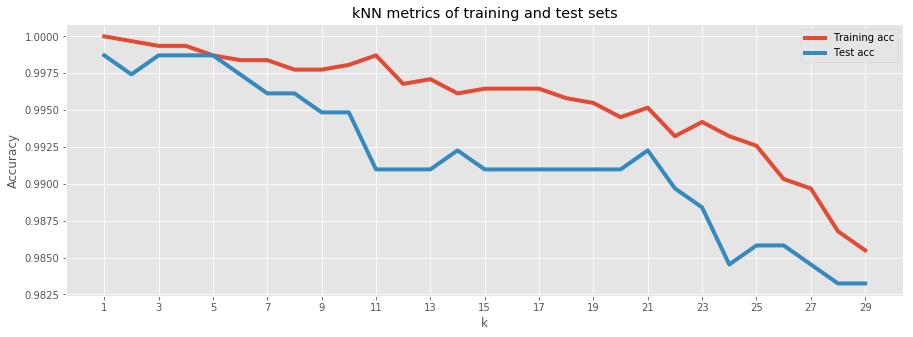

In [13]:
# Plot results
plt.plot(neighbors_range, train_acc, label="Training acc", linewidth=4.0)
plt.plot(neighbors_range, test_acc,  label="Test acc",     linewidth=4.0)
plt.ylabel("Accuracy")
plt.xlabel("k")
plt.title("kNN metrics of training and test sets")
plt.legend()
plt.rcParams["figure.figsize"] = [15,5]
plt.xticks(np.arange(1, 30, step=2));

In [14]:
# Get parameters of model
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 29,
 'p': 2,
 'weights': 'uniform'}

## Árboles de decisión

In [15]:
# Separate data intro training and test sets
x_train, x_test, y_train, y_test = train_test_split(input_features, output_class, test_size=0.20, random_state=0)

train_acc = []
test_acc  = []

max_depth_range = range(1, 20)

for max_depth_val in max_depth_range:
    # Generate Decision Tree model
    decision_tree = DecisionTreeClassifier(max_depth=max_depth_val, random_state=0)
    decision_tree.fit(x_train, y_train)
    # se almacena el "training set accuracy"
    train_acc.append(decision_tree.score(x_train, y_train))
    # se almacena la "generalization accuracy"
    test_acc.append(decision_tree.score(x_test, y_test))

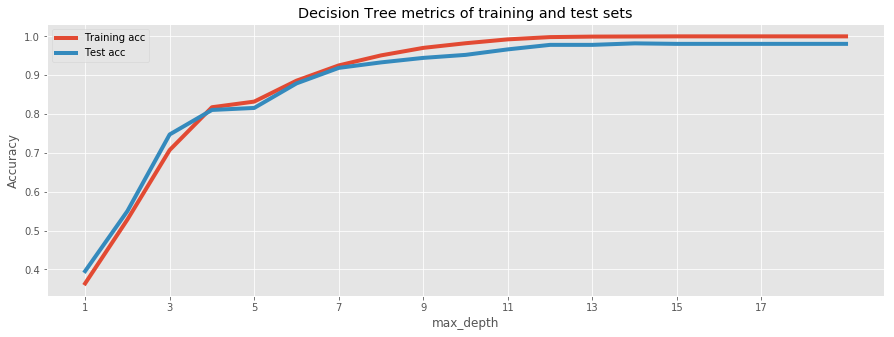

In [16]:
# Plot results
plt.plot(max_depth_range, train_acc, label="Training acc", linewidth=4.0)
plt.plot(max_depth_range, test_acc,  label="Test acc",     linewidth=4.0)
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.title("Decision Tree metrics of training and test sets")
plt.legend()
plt.rcParams["figure.figsize"] = [15,5]
plt.xticks(np.arange(1, max(max_depth_range), step=2));

In [17]:
decision_tree = DecisionTreeClassifier(max_depth=13, random_state=0)
decision_tree.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(decision_tree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(decision_tree.score(x_test, y_test)))

Accuracy on training set: 0.999
Accuracy on test set: 0.978


In [18]:
print("Feature importances:\n{}".format(decision_tree.feature_importances_))

Feature importances:
[0.00076877 0.00369262 0.00060541 0.00806752 0.00299529 0.00096865
 0.00587212 0.12049914 0.05368896 0.03044113 0.20476324 0.03792433
 0.17991764 0.01093015 0.28169968 0.05716535]


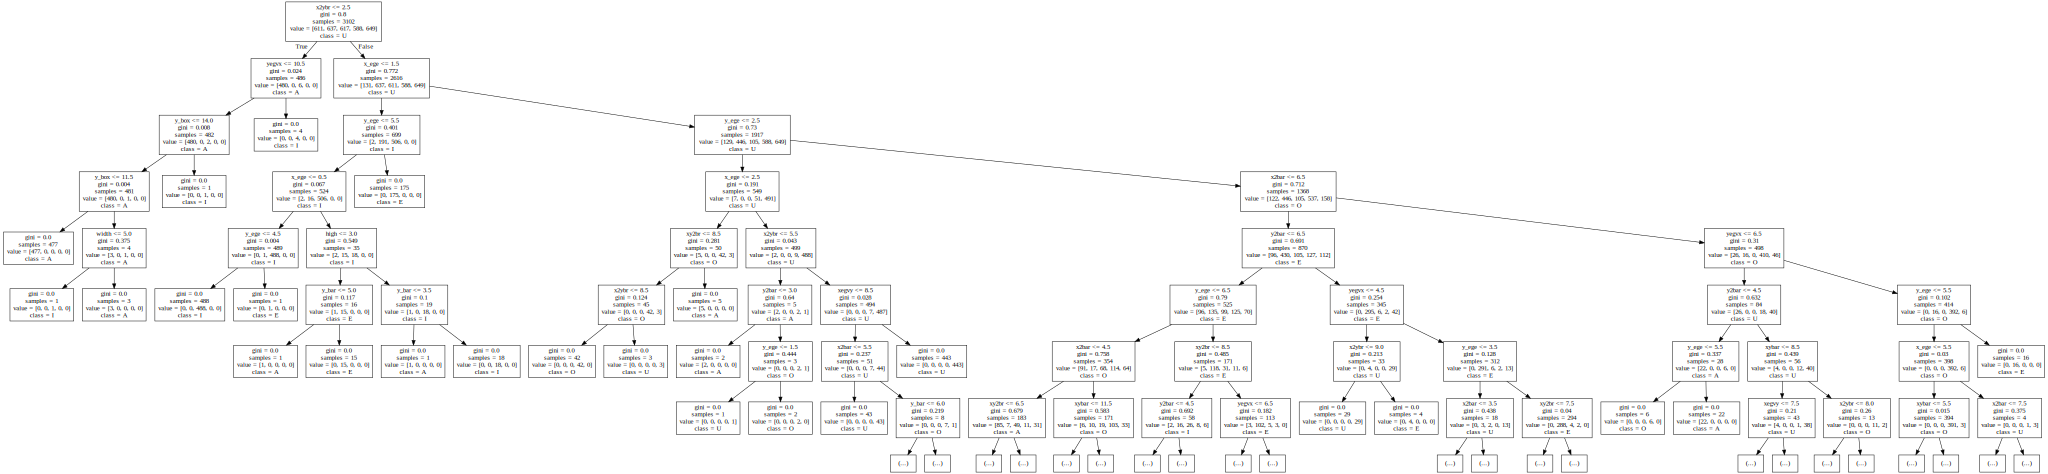

In [21]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(decision_tree, out_file=None)
graph = graphviz.Source(dot_data) 
#graph.render("decision_tree") 

dot_data = tree.export_graphviz(decision_tree, \
                               max_depth = 7, \
                               out_file = None,
                               feature_names = features,\
                               class_names = ["A", "E", "I", "O", "U"],\
                               leaves_parallel = False) 
graph = graphviz.Source(dot_data)  
graph

## Aprendizaje con Tensorflow

In [23]:
# Import Numpy, TensorFlow, TFLearn
import numpy as np
import tensorflow as tf
import tflearn

In [24]:
from sklearn.model_selection import train_test_split

# Separate data intro training and test sets
x_train, x_test, y_train, y_test = train_test_split(input_features, output_class_num, test_size=0.20, random_state=50)

In [26]:
tf.reset_default_graph()

# Build neural network
net = tflearn.input_data(shape=[None, 16])
net = tflearn.fully_connected(net, 32)
net = tflearn.fully_connected(net, 32)
net = tflearn.fully_connected(net, 5, activation='softmax')
net = tflearn.regression(net)
# Define model
model = tflearn.DNN(net)

In [27]:
# Training
N = len(y_train)
y_train_p = [0]*N
for n in range(0,N):
    y_train_p[n] = [0]*5
    y_train_p[n][y_train[n]] = 1

model.fit(x_train, y_train_p, validation_set=0.1, show_metric=True, batch_size=10, n_epoch=20)

Training Step: 5599  | total loss: 0.08163 | time: 1.071s
| Adam | epoch: 020 | loss: 0.08163 - acc: 0.9776 -- iter: 2790/2791
Training Step: 5600  | total loss: 0.09035 | time: 2.080s
| Adam | epoch: 020 | loss: 0.09035 - acc: 0.9698 | val_loss: 0.16063 - val_acc: 0.9550 -- iter: 2791/2791
--


In [28]:
# Find the indices of the best prediction for each test sample.
predictions = np.array(model.predict(x_test)).argmax(axis=1)

actual = y_test

test_accuracy = np.mean(predictions == actual, axis=0)

print("Test accuracy: ", test_accuracy)

Test accuracy:  0.9201030927835051


## Referencias

[1] [Letter Recognition Data Set](https://archive.ics.uci.edu/ml/datasets/Letter+Recognition)

[2] [Letter Recognition Using Holland-Style Adaptive Classifiers](http://www.cs.uu.nl/docs/vakken/mpr/Frey-Slate.pdf)